In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('month.csv')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-11-28T02:33:25.430Z,19.148167,-155.480164,12.1200,1.94,ml,36.0,160.0,NaN,0.22,...,2023-11-28T02:38:55.950Z,"6 km S of Pāhala, Hawaii",earthquake,0.54,0.440000,3.260,4.0,automatic,hv,hv
1,2023-11-28T02:33:21.080Z,19.161667,-155.488831,12.2700,2.22,md,27.0,114.0,NaN,0.18,...,2023-11-28T02:38:51.590Z,"4 km SSW of Pāhala, Hawaii",earthquake,0.48,0.410000,2.220,4.0,automatic,hv,hv
2,2023-11-28T02:26:54.610Z,7.659200,-82.431100,10.0000,4.90,mb,69.0,135.0,1.15600,0.81,...,2023-11-28T02:47:53.040Z,"63 km SE of Burica, Panama",earthquake,4.39,1.870000,0.034,265.0,reviewed,us,us
3,2023-11-28T02:16:26.528Z,31.675000,-104.482000,8.7714,1.80,ml(texnet),8.0,73.0,0.00000,0.20,...,2023-11-28T02:41:33.404Z,"56 km S of Whites City, New Mexico",earthquake,0.00,3.130411,0.200,6.0,automatic,tx,tx
4,2023-11-28T02:11:18.700Z,38.788166,-122.745331,1.4100,0.94,md,12.0,85.0,0.01677,0.03,...,2023-11-28T02:28:10.414Z,"2 km NE of The Geysers, CA",earthquake,0.28,0.620000,0.250,12.0,automatic,nc,nc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9256 entries, 0 to 9255
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9256 non-null   object 
 1   latitude         9256 non-null   float64
 2   longitude        9256 non-null   float64
 3   depth            9256 non-null   float64
 4   mag              9256 non-null   float64
 5   magType          9256 non-null   object 
 6   nst              7426 non-null   float64
 7   gap              7426 non-null   float64
 8   dmin             6091 non-null   float64
 9   rms              9256 non-null   float64
 10  net              9256 non-null   object 
 11  id               9256 non-null   object 
 12  updated          9256 non-null   object 
 13  place            9256 non-null   object 
 14  type             9256 non-null   object 
 15  horizontalError  6878 non-null   float64
 16  depthError       9256 non-null   float64
 17  magError      

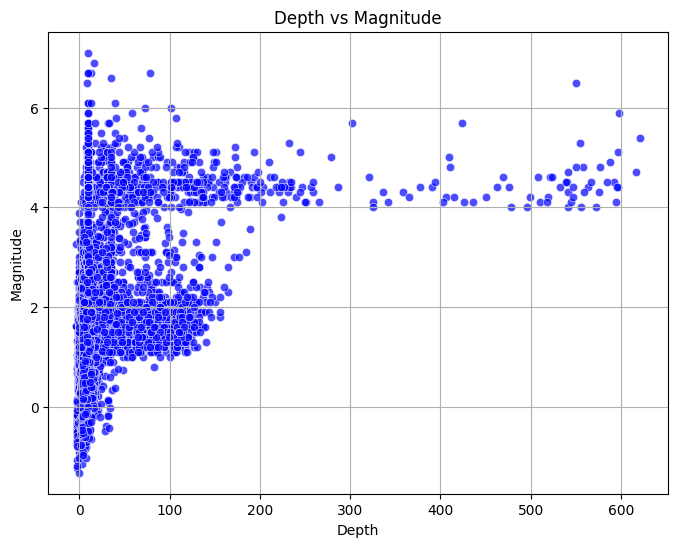

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='depth', y='mag', data=df, color='blue', alpha=0.7)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

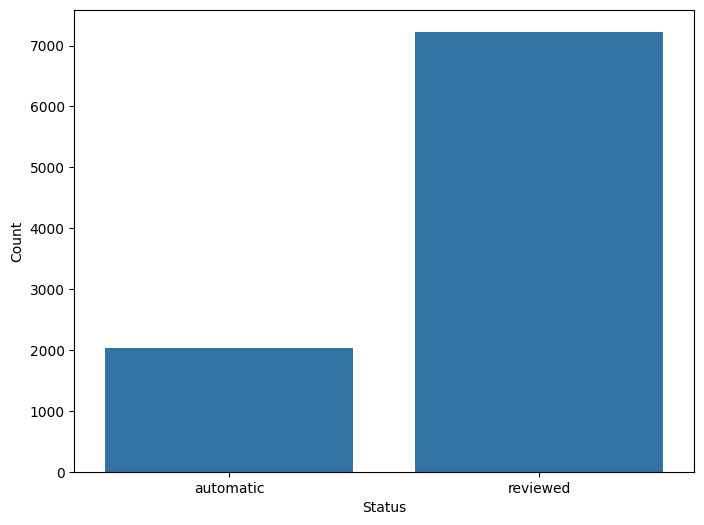

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)

plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

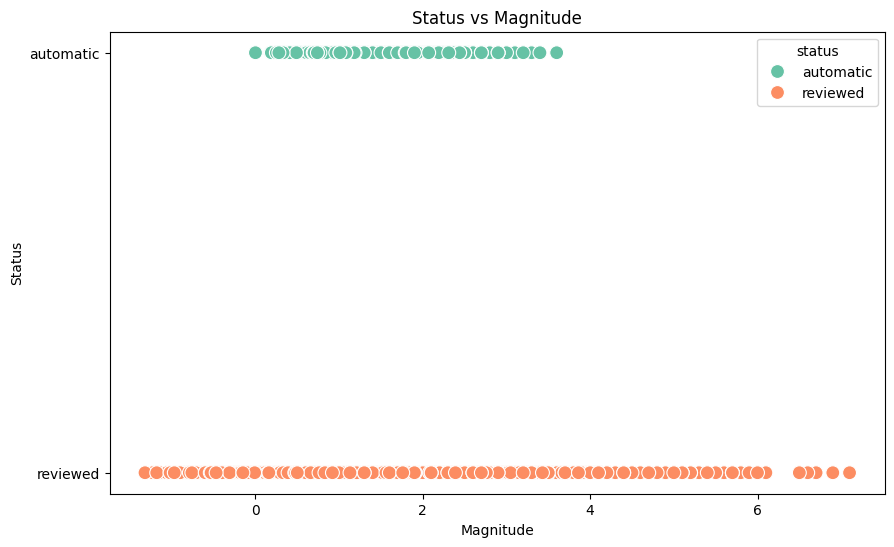

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mag', y='status', data=df, hue='status', palette='Set2', s=100)
plt.title('Status vs Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Status')
plt.show()

In [33]:
# 'time' converting to Datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

df['week'] = df['time'].dt.to_period('W')

In [10]:
df['week'].value_counts()

week
2023-10-30/2023-11-05    2659
2023-11-06/2023-11-12    2349
2023-11-20/2023-11-26    1861
2023-11-13/2023-11-19    1795
2023-10-23/2023-10-29     348
2023-11-27/2023-12-03     244
Freq: W-SUN, Name: count, dtype: int64

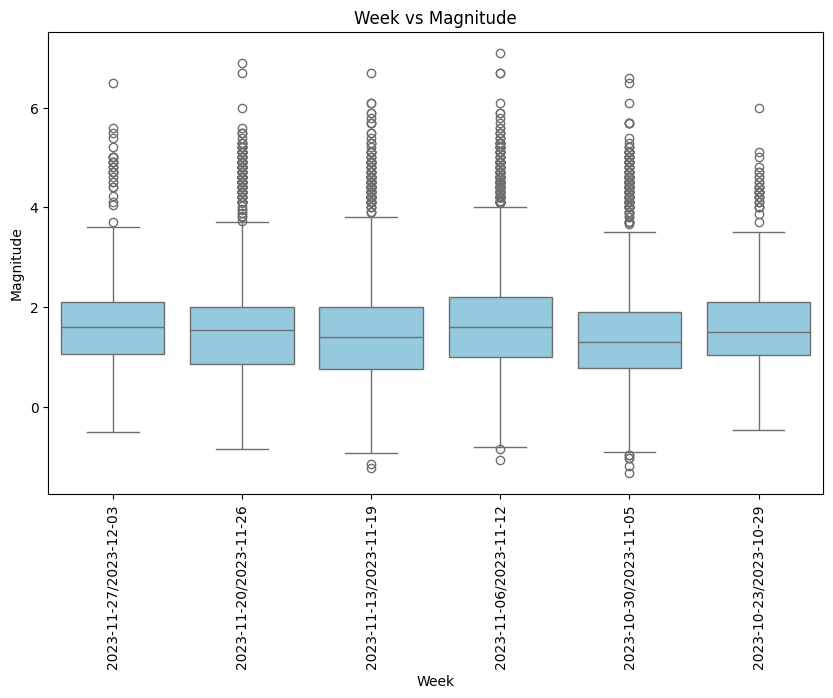

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['week'], y=df['mag'], color='skyblue')
plt.title('Week vs Magnitude')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.ylabel('Magnitude')
plt.show()

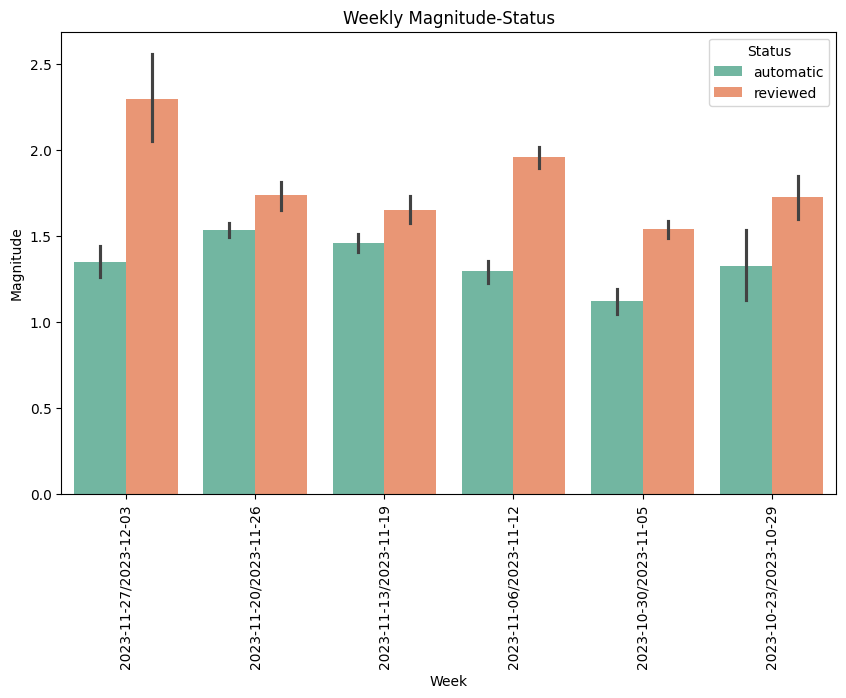

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='week', y='mag', hue='status', data=df, palette='Set2')
plt.title('Weekly Magnitude-Status')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.ylabel('Magnitude')
plt.legend(title='Status')
plt.show()

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_19567/1664769966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='mag', data=df, palette='Set2')


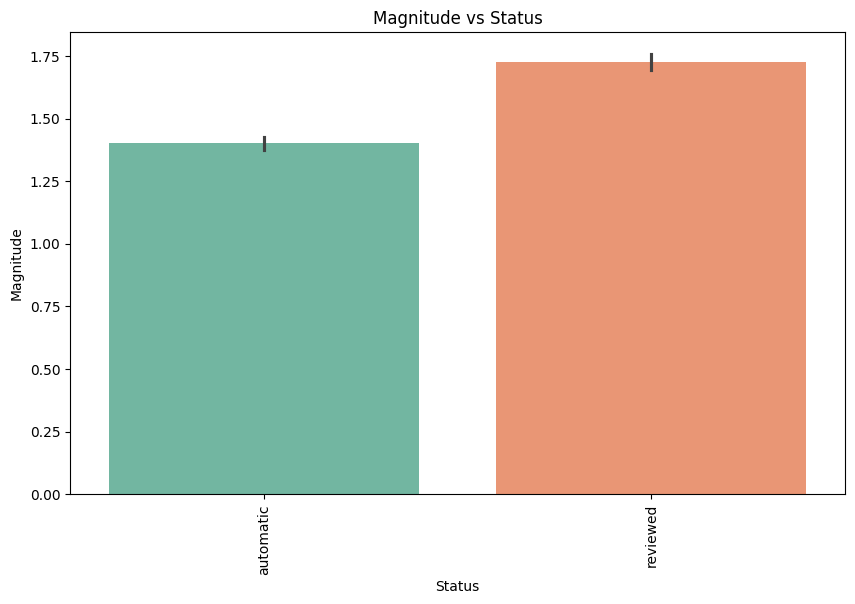

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='mag', data=df, palette='Set2')
plt.title('Magnitude vs Status')
plt.xlabel('Status')
plt.xticks(rotation=90)
plt.ylabel('Magnitude')
plt.show()

In [19]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['daily'] = df['time'].dt.to_period('D')

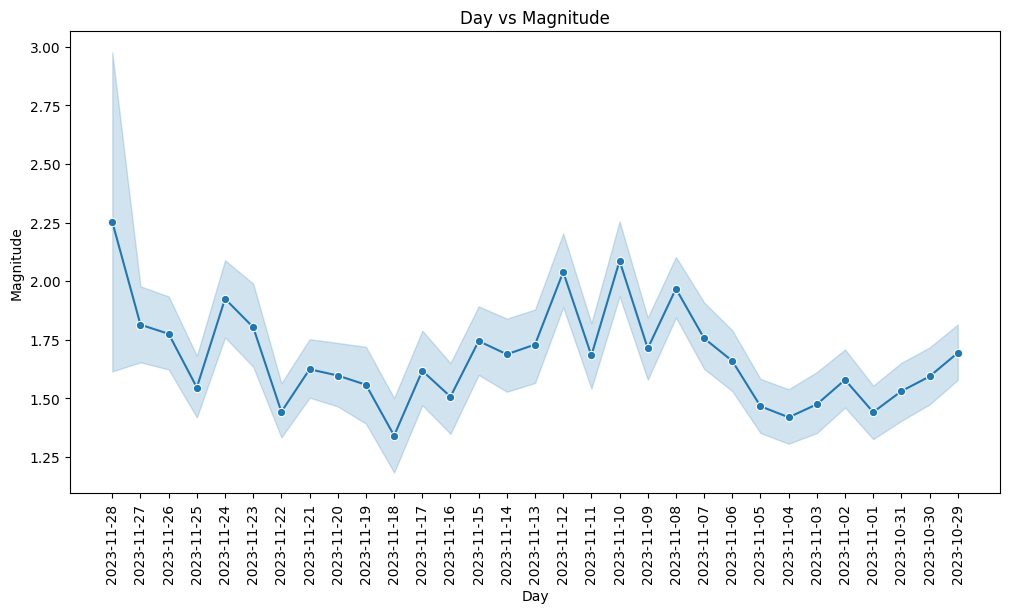

In [34]:
df['daily'] = df['time'].dt.to_period('D').astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='daily', y='mag', data=df, marker='o')
plt.title('Day vs Magnitude')
plt.xlabel('Day')
plt.xticks(rotation=90)
plt.ylabel('Magnitude')
plt.show()